<a href="https://colab.research.google.com/github/ashishballa/ashishballa/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installation**

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

# **Start spark session**

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

# Creates a Spark session using the local[*] master
spark = SparkSession.builder.master("local[*]").getOrCreate()

**Upload** **csv**

In [ ]:
# Upload files to google colab
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [ ]:
# Reading this uploaded file and use this data frame.
file_path = "/content/BostonHousing.csv"
df = spark.read.format("csv").options(header="true", inferSchema="true").load(file_path)


# **EDA**

In [ ]:
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [ ]:
# Rename the columns
df = df.withColumnRenamed("crim", "CrimeRate") \
       .withColumnRenamed("zn", "LandProp") \
       .withColumnRenamed("indus", "NonRetailBusiness") \
       .withColumnRenamed("chas", "NearCharlesRiver") \
       .withColumnRenamed("nox", "NitrogenOxideConc") \
       .withColumnRenamed("rm", "AvgRoomsPerDwelling") \
       .withColumnRenamed("age", "AgeOldUnits") \
       .withColumnRenamed("dis", "WeightedDistanceToEmploymentCenters") \
       .withColumnRenamed("rad", "AccessibilityToRadialHighways") \
       .withColumnRenamed("tax", "PropertyTaxRate") \
       .withColumnRenamed("ptratio", "PeopleTeacherRatio") \
       .withColumnRenamed("b", "ProportionAfricanAmericanResidents") \
       .withColumnRenamed("lstat", "LowerStatusPercentage") \
       .withColumnRenamed("medv", "MedianHouseValue")

numeric_columns = ["CrimeRate", "LandProp", "NonRetailBusiness", "NearCharlesRiver", "AvgRoomsPerDwelling",
                   "AgeOldUnits", "WeightedDistanceToEmploymentCenters", "AccessibilityToRadialHighways", "PropertyTaxRate",
                   "PeopleTeacherRatio", "ProportionAfricanAmericanResidents", "LowerStatusPercentage", "MedianHouseValue"]

df.printSchema()

root
 |-- CrimeRate: double (nullable = true)
 |-- LandProp: double (nullable = true)
 |-- NonRetailBusiness: double (nullable = true)
 |-- NearCharlesRiver: integer (nullable = true)
 |-- NitrogenOxideConc: double (nullable = true)
 |-- AvgRoomsPerDwelling: double (nullable = true)
 |-- AgeOldUnits: double (nullable = true)
 |-- WeightedDistanceToEmploymentCenters: double (nullable = true)
 |-- AccessibilityToRadialHighways: integer (nullable = true)
 |-- PropertyTaxRate: integer (nullable = true)
 |-- PeopleTeacherRatio: double (nullable = true)
 |-- ProportionAfricanAmericanResidents: double (nullable = true)
 |-- LowerStatusPercentage: double (nullable = true)
 |-- MedianHouseValue: double (nullable = true)



In [ ]:
df.printSchema()

root
 |-- CrimeRate: double (nullable = true)
 |-- LandProp: double (nullable = true)
 |-- NonRetailBusiness: double (nullable = true)
 |-- NearCharlesRiver: integer (nullable = true)
 |-- NitrogenOxideConc: double (nullable = true)
 |-- AvgRoomsPerDwelling: double (nullable = true)
 |-- AgeOldUnits: double (nullable = true)
 |-- WeightedDistanceToEmploymentCenters: double (nullable = true)
 |-- AccessibilityToRadialHighways: integer (nullable = true)
 |-- PropertyTaxRate: integer (nullable = true)
 |-- PeopleTeacherRatio: double (nullable = true)
 |-- ProportionAfricanAmericanResidents: double (nullable = true)
 |-- LowerStatusPercentage: double (nullable = true)
 |-- MedianHouseValue: double (nullable = true)



In [ ]:
pandas_df = df.toPandas()
print("First 5 rows")
print(pandas_df.head(5))
print("\nLast 5 rows")
print(pandas_df.tail(5))

First 5 rows
   CrimeRate  LandProp  NonRetailBusiness  NearCharlesRiver  \
0    0.00632      18.0               2.31                 0   
1    0.02731       0.0               7.07                 0   
2    0.02729       0.0               7.07                 0   
3    0.03237       0.0               2.18                 0   
4    0.06905       0.0               2.18                 0   

   NitrogenOxideConc  AvgRoomsPerDwelling  AgeOldUnits  \
0              0.538                6.575         65.2   
1              0.469                6.421         78.9   
2              0.469                7.185         61.1   
3              0.458                6.998         45.8   
4              0.458                7.147         54.2   

   WeightedDistanceToEmploymentCenters  AccessibilityToRadialHighways  \
0                               4.0900                              1   
1                               4.9671                              2   
2                               4.9671  

In [ ]:
from pyspark.sql.types import DoubleType

columns_to_cast = ["CrimeRate", "LandProp", "NonRetailBusiness", "NearCharlesRiver", "AgeOldUnits", "LowerStatusPercentage"]

for col_name in columns_to_cast:
    df2 = df.withColumn(col_name, df[col_name].cast(DoubleType()))



In [ ]:
df2.show()

+---------+--------+-----------------+----------------+-----------------+-------------------+-----------+-----------------------------------+-----------------------------+---------------+------------------+----------------------------------+---------------------+----------------+
|CrimeRate|LandProp|NonRetailBusiness|NearCharlesRiver|NitrogenOxideConc|AvgRoomsPerDwelling|AgeOldUnits|WeightedDistanceToEmploymentCenters|AccessibilityToRadialHighways|PropertyTaxRate|PeopleTeacherRatio|ProportionAfricanAmericanResidents|LowerStatusPercentage|MedianHouseValue|
+---------+--------+-----------------+----------------+-----------------+-------------------+-----------+-----------------------------------+-----------------------------+---------------+------------------+----------------------------------+---------------------+----------------+
|  0.00632|    18.0|             2.31|               0|            0.538|              6.575|       65.2|                               4.09|                

In [ ]:
df2 = df2.na.drop()

In [ ]:
from pyspark.sql.functions import col

# Create a list of column names
column_names = df.columns

# Create a dictionary to store the null counts for each column
null_counts = {}

# Calculate the count of null values for each column
for column in column_names:
    null_count = df.filter(col(column).isNull()).count()
    null_counts[column] = null_count

# Display the null counts for each column
for column, count in null_counts.items():
    print(f" '{column}': {count} null values")

 'CrimeRate': 0 null values
 'LandProp': 0 null values
 'NonRetailBusiness': 0 null values
 'NearCharlesRiver': 0 null values
 'NitrogenOxideConc': 0 null values
 'AvgRoomsPerDwelling': 0 null values
 'AgeOldUnits': 0 null values
 'WeightedDistanceToEmploymentCenters': 0 null values
 'AccessibilityToRadialHighways': 0 null values
 'PropertyTaxRate': 0 null values
 'PeopleTeacherRatio': 0 null values
 'ProportionAfricanAmericanResidents': 0 null values
 'LowerStatusPercentage': 0 null values
 'MedianHouseValue': 0 null values


In [ ]:
df.describe().show()


+-------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-----------------------------------+-----------------------------+------------------+------------------+----------------------------------+---------------------+------------------+
|summary|         CrimeRate|          LandProp| NonRetailBusiness|  NearCharlesRiver|  NitrogenOxideConc|AvgRoomsPerDwelling|       AgeOldUnits|WeightedDistanceToEmploymentCenters|AccessibilityToRadialHighways|   PropertyTaxRate|PeopleTeacherRatio|ProportionAfricanAmericanResidents|LowerStatusPercentage|  MedianHouseValue|
+-------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-----------------------------------+-----------------------------+------------------+------------------+----------------------------------+---------------------+------------------+
|  count|               5

In [ ]:
from pyspark.ml.feature import Bucketizer
from pyspark.sql.functions import col

# Define the bin edges
splits = [0, 4, 6, float("inf")]

# Create the Bucketizer
bucketizer = Bucketizer(splits=splits, inputCol="AvgRoomsPerDwelling", outputCol="RM_bins")

# Apply the Bucketizer to your DataFrame
df = bucketizer.transform(df)


## **Visualizations and Analysis**

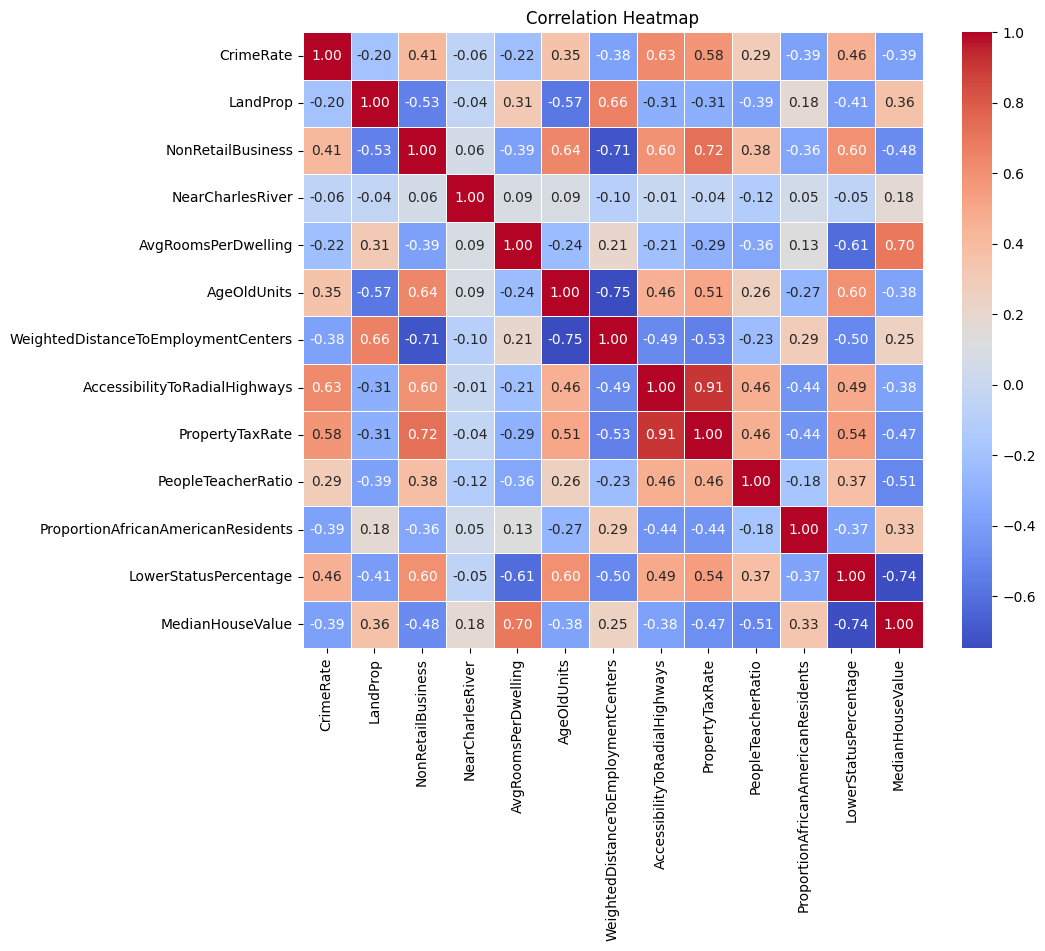

In [ ]:


from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of numeric column names to compute correlation
numeric_columns = ["CrimeRate", "LandProp", "NonRetailBusiness", "NearCharlesRiver", "AvgRoomsPerDwelling",
                   "AgeOldUnits", "WeightedDistanceToEmploymentCenters", "AccessibilityToRadialHighways", "PropertyTaxRate",
                   "PeopleTeacherRatio", "ProportionAfricanAmericanResidents", "LowerStatusPercentage", "MedianHouseValue"]

# Check if the outputCol name "correlation_features" vector features already exists in the DataFrame
if "correlation_features" not in df.columns:
    # Create a VectorAssembler to assemble all numeric columns into a single vector column
    assembler = VectorAssembler(inputCols=numeric_columns, outputCol="correlation_features")

    # Transform the DataFrame to include the vector column
    df = assembler.transform(df)

# Calculate the correlation matrix
correlation_matrix = Correlation.corr(df, "correlation_features", method="pearson").collect()[0][0]


# Convert the correlation matrix (DenseMatrix) to a Pandas DataFrame
corr_df = pd.DataFrame(correlation_matrix.toArray(), columns=numeric_columns, index=numeric_columns)

# Create a correlation heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of numeric column names to compute correlation for
numeric_columns = ["CrimeRate", "LandProp", "NonRetailBusiness", "NearCharlesRiver", "AvgRoomsPerDwelling",
                   "AgeOldUnits", "WeightedDistanceToEmploymentCenters", "AccessibilityToRadialHighways", "PropertyTaxRate",
                   "PeopleTeacherRatio", "ProportionAfricanAmericanResidents", "LowerStatusPercentage", "MedianHouseValue"]

# Check if the "features" column already exists in the DataFrame
if "features" not in df.columns:
    # Create a VectorAssembler to assemble all numeric columns into a single vector column
    assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")

    # Transform the DataFrame to include the vector column
    df = assembler.transform(df)

df.printSchema()
print("Number of rows in df:", df.count())
print("Before Correlation.corr operation")

# Check if the Spark session is active (not stopped)
if not spark._sc._jsc.sc().isStopped():
    # Calculate the correlation matrix
    correlation_matrix = Correlation.corr(df, "features").head()
    print("After Correlation.corr operation")

    # Extract the correlation matrix as a NumPy array
    corr_matrix = correlation_matrix[0].toArray()

    # Display the correlation matrix
    for i, col in enumerate(numeric_columns):
        for j in range(i, len(numeric_columns)):
            print(f"Correlation between '{col}' and '{numeric_columns[j]}': {corr_matrix[i, j]}")
else:
    print("Spark session is stopped.")


root
 |-- CrimeRate: double (nullable = true)
 |-- LandProp: double (nullable = true)
 |-- NonRetailBusiness: double (nullable = true)
 |-- NearCharlesRiver: integer (nullable = true)
 |-- NitrogenOxideConc: double (nullable = true)
 |-- AvgRoomsPerDwelling: double (nullable = true)
 |-- AgeOldUnits: double (nullable = true)
 |-- WeightedDistanceToEmploymentCenters: double (nullable = true)
 |-- AccessibilityToRadialHighways: integer (nullable = true)
 |-- PropertyTaxRate: integer (nullable = true)
 |-- PeopleTeacherRatio: double (nullable = true)
 |-- ProportionAfricanAmericanResidents: double (nullable = true)
 |-- LowerStatusPercentage: double (nullable = true)
 |-- MedianHouseValue: double (nullable = true)
 |-- rm_bin: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- correlation_features: vector (nullable = true)

Number of rows in df: 506
Before Correlation.corr operation
After Correlation.corr operation
Correlation between 'CrimeRate' and 'CrimeRate': 1.0
Co

In [ ]:
# Select the "RM" and "MEDV" columns
rm_medv_df = df.select("AvgRoomsPerDwelling", "MedianHouseValue")

# Collect the values of the "RM" column as a list
rm_values = rm_medv_df.select("AvgRoomsPerDwelling").rdd.flatMap(lambda x: x).collect()

# Define the number of bins and calculate the histogram
num_bins = 5
hist, bin_edges = np.histogram(rm_values, bins=num_bins)


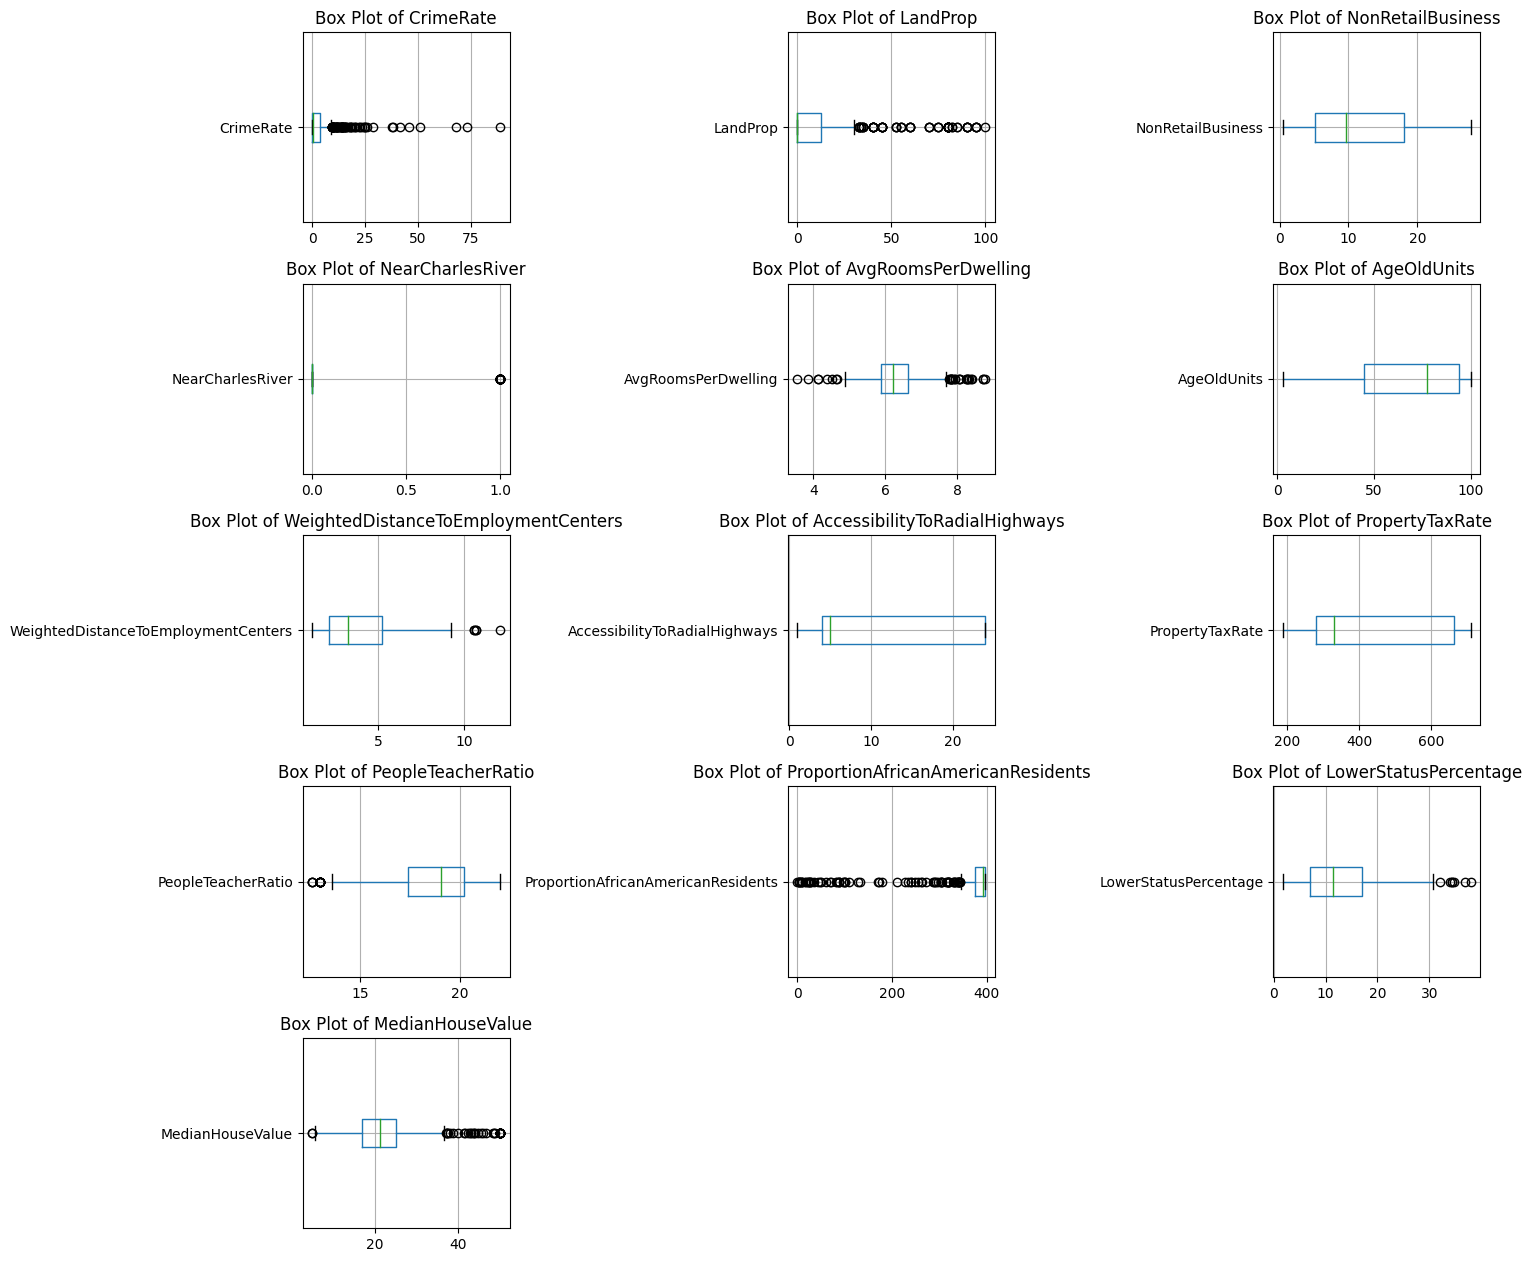

In [ ]:
import matplotlib.pyplot as plt

# Specify the numeric columns you want to plot
numeric_columns = ["CrimeRate", "LandProp", "NonRetailBusiness", "NearCharlesRiver", "AvgRoomsPerDwelling",
                   "AgeOldUnits", "WeightedDistanceToEmploymentCenters", "AccessibilityToRadialHighways", "PropertyTaxRate",
                   "PeopleTeacherRatio", "ProportionAfricanAmericanResidents", "LowerStatusPercentage", "MedianHouseValue"]

# Calculate the number of rows and columns for subplots
num_rows = len(numeric_columns) // 2
num_cols = 2 if len(numeric_columns) % 2 == 0 else 3

# Create a single figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array
axes = axes.ravel()

# Plot box plots for each numeric column
for i, col in enumerate(numeric_columns):
    df.select(col).toPandas().boxplot(ax=axes[i], vert=False)
    axes[i].set_title(f"Box Plot of {col}")

# Remove empty subplots if needed
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


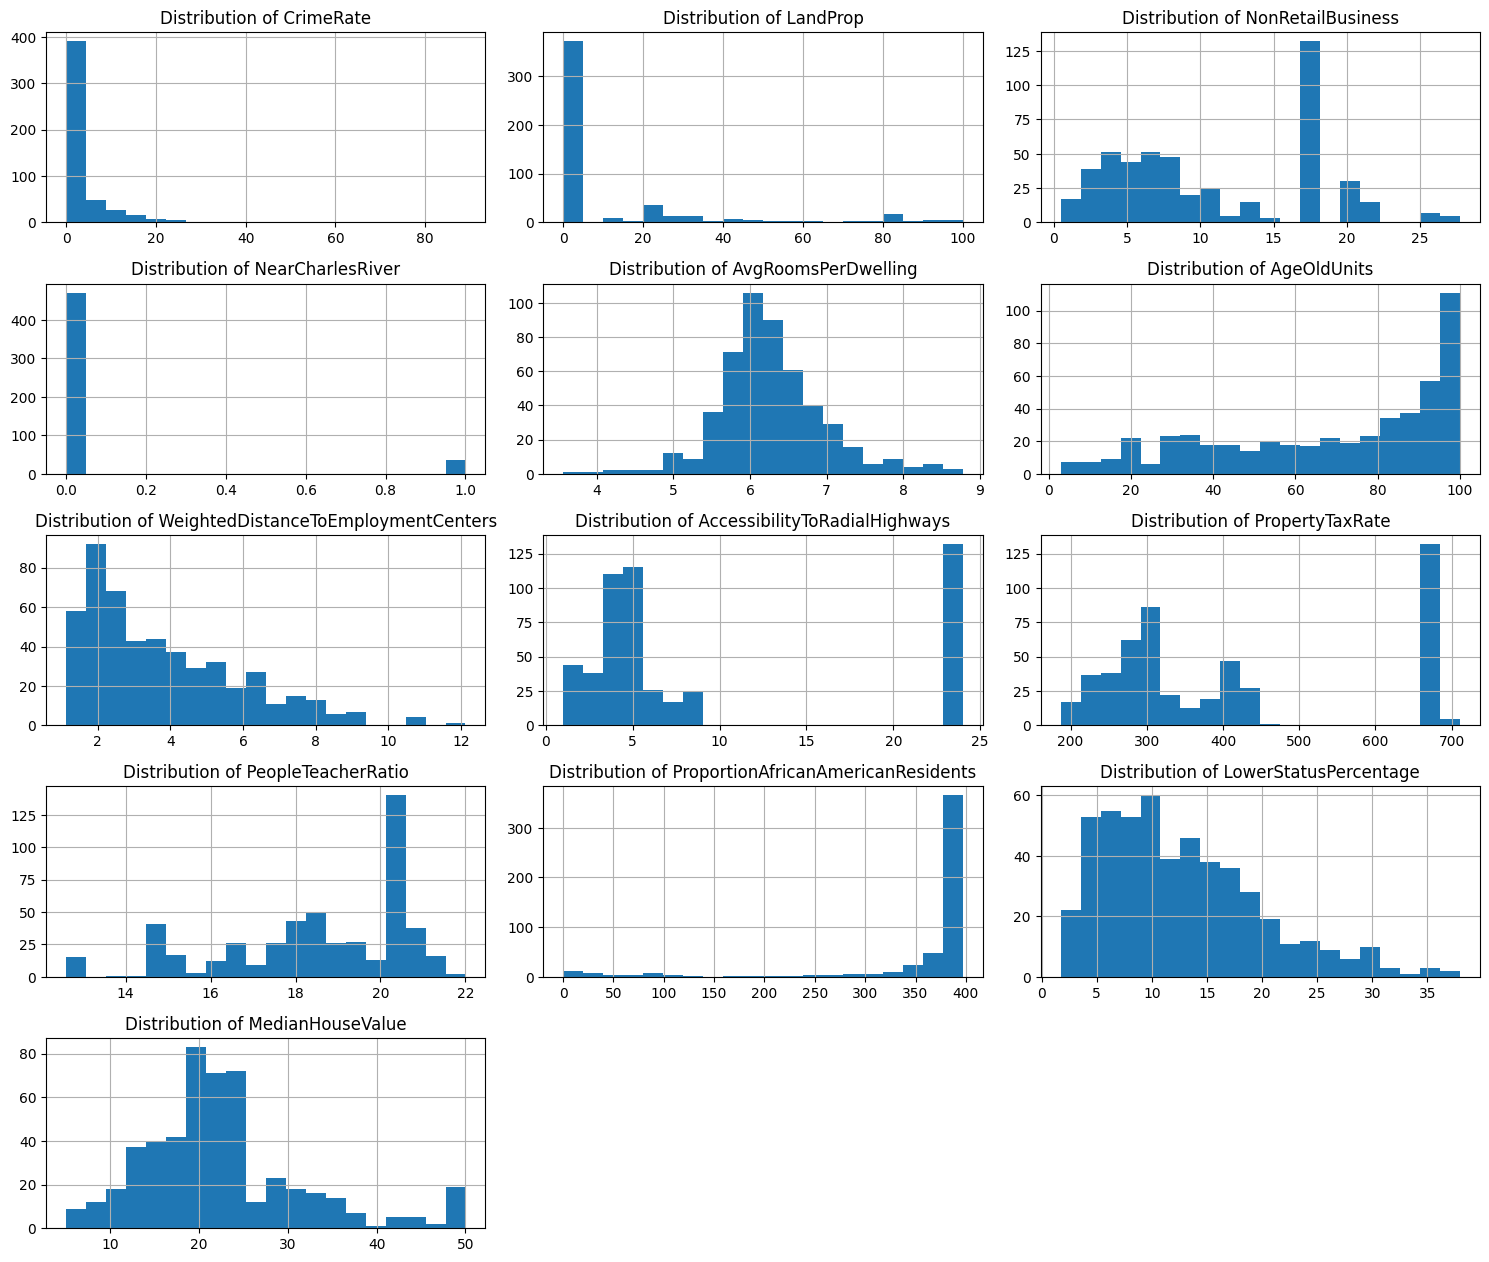

In [ ]:
import matplotlib.pyplot as plt

# Specify the numeric columns you want to plot
numeric_columns = ["CrimeRate", "LandProp", "NonRetailBusiness", "NearCharlesRiver", "AvgRoomsPerDwelling",
                   "AgeOldUnits", "WeightedDistanceToEmploymentCenters", "AccessibilityToRadialHighways", "PropertyTaxRate",
                   "PeopleTeacherRatio", "ProportionAfricanAmericanResidents", "LowerStatusPercentage", "MedianHouseValue"]
# Calculate the number of rows and columns for subplots
num_rows = len(numeric_columns) // 2
num_cols = 2 if len(numeric_columns) % 2 == 0 else 3

# Create a single figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array
axes = axes.ravel()

# Plot histograms for each numeric column
for i, col in enumerate(numeric_columns):
    df.select(col).toPandas().hist(bins=20, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Remove empty subplots if needed
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Histograms and Box Plots

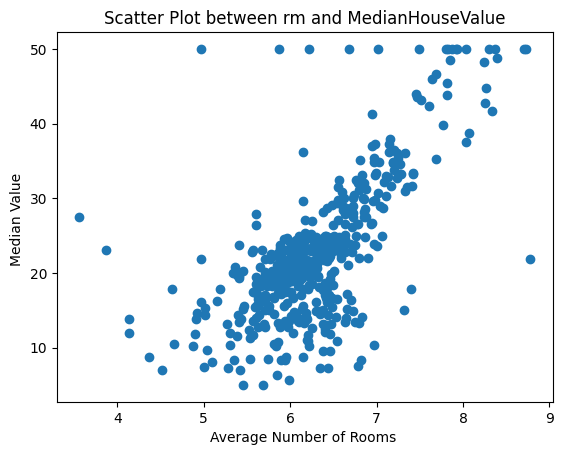

In [ ]:
import matplotlib.pyplot as plt

# Collect the values of the "rm" and "medv" columns as lists
rm_values = df.select("AvgRoomsPerDwelling").rdd.flatMap(lambda x: x).collect()
medv_values = df.select("MedianHouseValue").rdd.flatMap(lambda x: x).collect()
["CrimeRate", "LandProp", "NonRetailBusiness", "NearCharlesRiver", "AvgRoomsPerDwelling",
                   "AgeOldUnits", "WeightedDistanceToEmploymentCenters", "AccessibilityToRadialHighways", "PropertyTaxRate",
                   "PeopleTeacherRatio", "ProportionAfricanAmericanResidents", "LowerStatusPercentage", "MedianHouseValue"]
# Create a scatter plot using the collected values
plt.scatter(rm_values, medv_values)
plt.xlabel("Average Number of Rooms ")
plt.ylabel("Median Value ")
plt.title("Scatter Plot between rm and MedianHouseValue")
plt.show()


{'Bin': 1, 'Bin Start': 0.00632, 'Bin End': 4.454814, 'Frequency': 391}
{'Bin': 2, 'Bin Start': 4.454814, 'Bin End': 8.903308, 'Frequency': 48}
{'Bin': 3, 'Bin Start': 8.903308, 'Bin End': 13.351802000000001, 'Frequency': 27}
{'Bin': 4, 'Bin Start': 13.351802000000001, 'Bin End': 17.800296, 'Frequency': 17}
{'Bin': 5, 'Bin Start': 17.800296, 'Bin End': 22.24879, 'Frequency': 8}
{'Bin': 6, 'Bin Start': 22.24879, 'Bin End': 26.697284, 'Frequency': 6}
{'Bin': 7, 'Bin Start': 26.697284, 'Bin End': 31.145778, 'Frequency': 1}
{'Bin': 8, 'Bin Start': 31.145778, 'Bin End': 35.594272000000004, 'Frequency': 0}
{'Bin': 9, 'Bin Start': 35.594272000000004, 'Bin End': 40.042766, 'Frequency': 2}
{'Bin': 10, 'Bin Start': 40.042766, 'Bin End': 44.491260000000004, 'Frequency': 1}
{'Bin': 11, 'Bin Start': 44.491260000000004, 'Bin End': 48.93975400000001, 'Frequency': 1}
{'Bin': 12, 'Bin Start': 48.93975400000001, 'Bin End': 53.388248000000004, 'Frequency': 1}
{'Bin': 13, 'Bin Start': 53.388248000000004, 

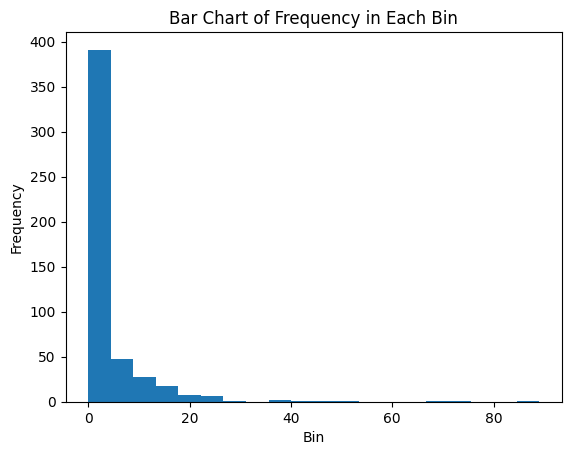

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Collect the values of the column as a list
crim_values = df.select("crimerate").rdd.flatMap(lambda x: x).collect()

# Create a histogram for the collected values
hist, bin_edges = np.histogram(crim_values, bins=20)

# Calculate statistics for each bin
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_stats = []
for i in range(len(hist)):
    bin_stats.append({
        "Bin": i + 1,
        "Bin Start": bin_edges[i],
        "Bin End": bin_edges[i + 1],
        "Frequency": hist[i],
    })

# Display the statistics for each bin
for stat in bin_stats:
    print(stat)

# Create a bar chart to represent the frequencies in each bin
plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], align='center')
plt.xlabel("Bin")
plt.ylabel("Frequency")
plt.title("Bar Chart of Frequency in Each Bin")
plt.show()


(1, 3.561, 4.6048, 6)
(2, 4.6048, 5.6486, 59)
(3, 5.6486, 6.692399999999999, 328)
(4, 6.692399999999999, 7.736199999999999, 91)
(5, 7.736199999999999, 8.78, 22)


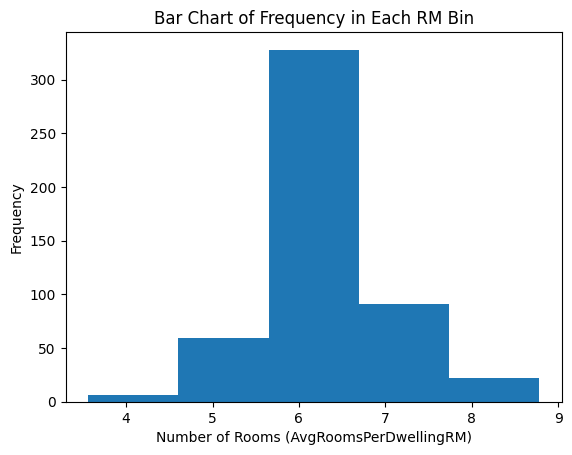

In [ ]:
# Select the "RM" and "MEDV" columns
rm_medv_df = df.select("AvgRoomsPerDwelling", "MedianHouseValue")

# Collect the values of the "RM" column as a list
rm_values = rm_medv_df.select("AvgRoomsPerDwelling").rdd.flatMap(lambda x: x).collect()

# Define the number of bins and calculate the histogram
num_bins = 5
hist, bin_edges = np.histogram(rm_values, bins=num_bins)

# Calculate statistics for each bin
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_stats = [(i + 1, bin_edges[i], bin_edges[i + 1], hist[i]) for i in range(len(hist))]

# Display the statistics for each bin
for stat in bin_stats:
    print(stat)

# Create a bar chart to represent the frequencies in each bin
plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], align='center')
plt.xlabel("Number of Rooms (AvgRoomsPerDwellingRM)")
plt.ylabel("Frequency")
plt.title("Bar Chart of Frequency in Each RM Bin")
plt.show()

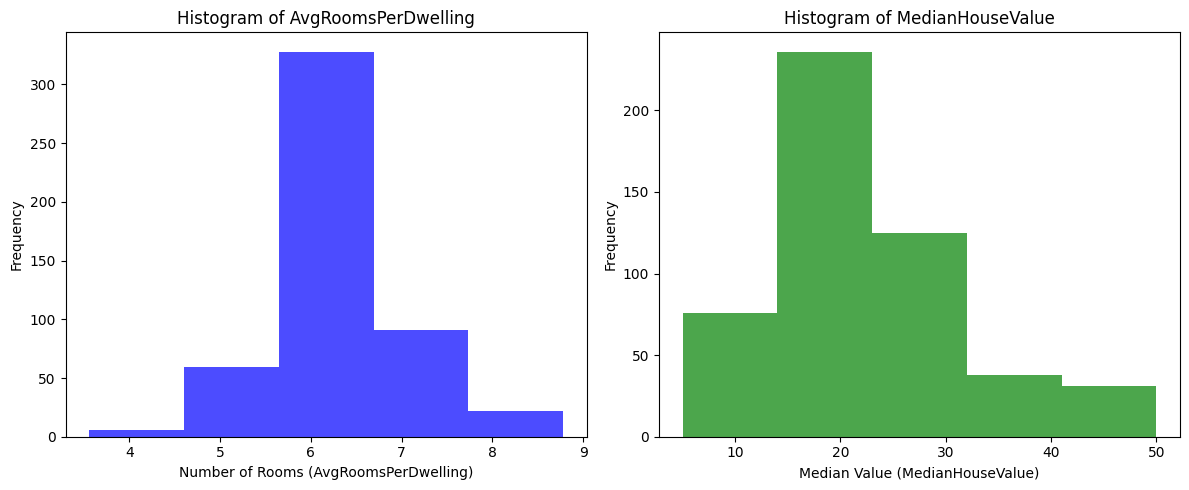

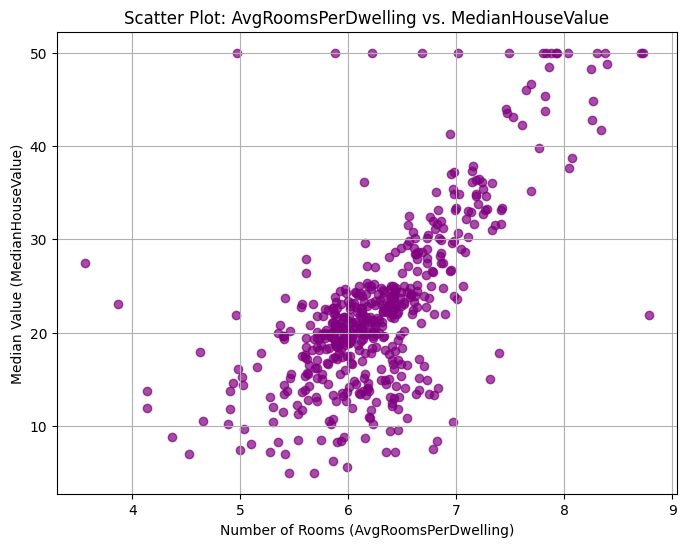

In [ ]:
rm_medv_df = df.select("AvgRoomsPerDwelling", "MedianHouseValue")

# Calculate the number of bins for the histograms
num_bins = 5

# Create histograms for "RM" and "MEDV"
plt.figure(figsize=(12, 5))

# Histogram for "RM"
plt.subplot(1, 2, 1)
plt.hist(rm_medv_df.select("AvgRoomsPerDwelling").rdd.flatMap(lambda x: x).collect(), bins=num_bins, color='blue', alpha=0.7)
plt.xlabel("Number of Rooms (AvgRoomsPerDwelling)")
plt.ylabel("Frequency")
plt.title("Histogram of AvgRoomsPerDwelling")

# Histogram for "MEDV"
plt.subplot(1, 2, 2)
plt.hist(rm_medv_df.select("MedianHouseValue").rdd.flatMap(lambda x: x).collect(), bins=num_bins, color='green', alpha=0.7)
plt.xlabel("Median Value (MedianHouseValue)")
plt.ylabel("Frequency")
plt.title("Histogram of MedianHouseValue")

plt.tight_layout()
plt.show()

# Create a bar chart to represent the relationship between "RM" and "MEDV"
rm_medv_df = rm_medv_df.toPandas()

plt.figure(figsize=(8, 6))
plt.scatter(rm_medv_df["AvgRoomsPerDwelling"], rm_medv_df["MedianHouseValue"], alpha=0.7, color='purple')
plt.xlabel("Number of Rooms (AvgRoomsPerDwelling)")
plt.ylabel("Median Value (MedianHouseValue)")
plt.title("Scatter Plot: AvgRoomsPerDwelling vs. MedianHouseValue")
plt.grid(True)
plt.show()

